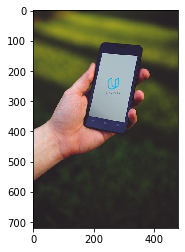

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

#Read in the image
image = cv2.imread('images/phone.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

plt.imshow(image)

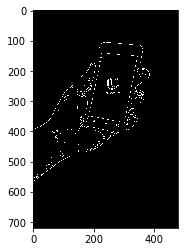

In [3]:
#perform canny edge detection
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray_image,low_threshold,high_threshold)
plt.imshow(edges,cmap='gray')

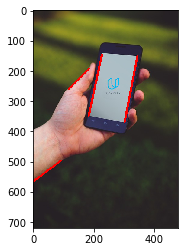

In [14]:
#Find lines using Hough Transform
#define parameters
rho = 1
theta = np.pi/180
threshold = 120
min_line_length = 50
min_line_gap = 5

line_image = np.copy(image) #Creating a copy of original image

lines = cv2.HoughLinesP(edges,rho,theta,threshold,np.array([]),
                       min_line_length,min_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(line_image)

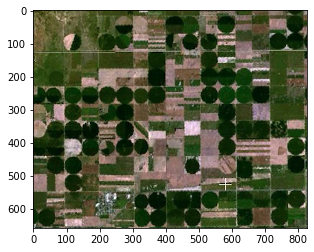

In [15]:
# Read in the image
image_2 = cv2.imread('images/round_farms.jpg')

# Change color to RGB (from BGR)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

plt.imshow(image_2)

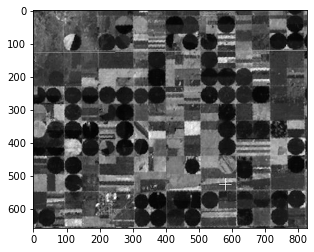

In [16]:
#Convert to gray scale
gray_image_2 = cv2.cvtColor(image_2,cv2.COLOR_RGB2GRAY)
gray_blur = cv2.GaussianBlur(gray_image_2,(3,3),0)
plt.imshow(gray_blur,cmap='gray')

Circles shape:  (1, 176, 3)


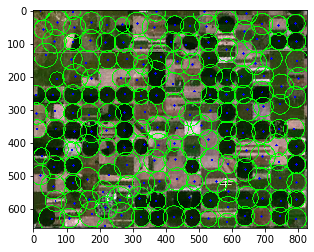

In [18]:
# for drawing circles on
circles_im = np.copy(image_2)

#Draw circles on image
circles = cv2.HoughCircles(gray_blur,cv2.HOUGH_GRADIENT,1,
                          minDist=45,
                          param1=70,
                          param2=11,
                          minRadius=20,
                          maxRadius=40)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)